# Import Libraries/Dependencies 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

# Get Data 

Read in the KNN_Project_Data csv file into a dataframe. Then check the head of the dataframe. 

In [17]:
knn_data = pd.read_csv('KNN_Project_Data')

In [18]:
knn_data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


## EDA(Exploritory Data Analysis)

Create a pairplot using seaborn with hue=TARGET CLASS column

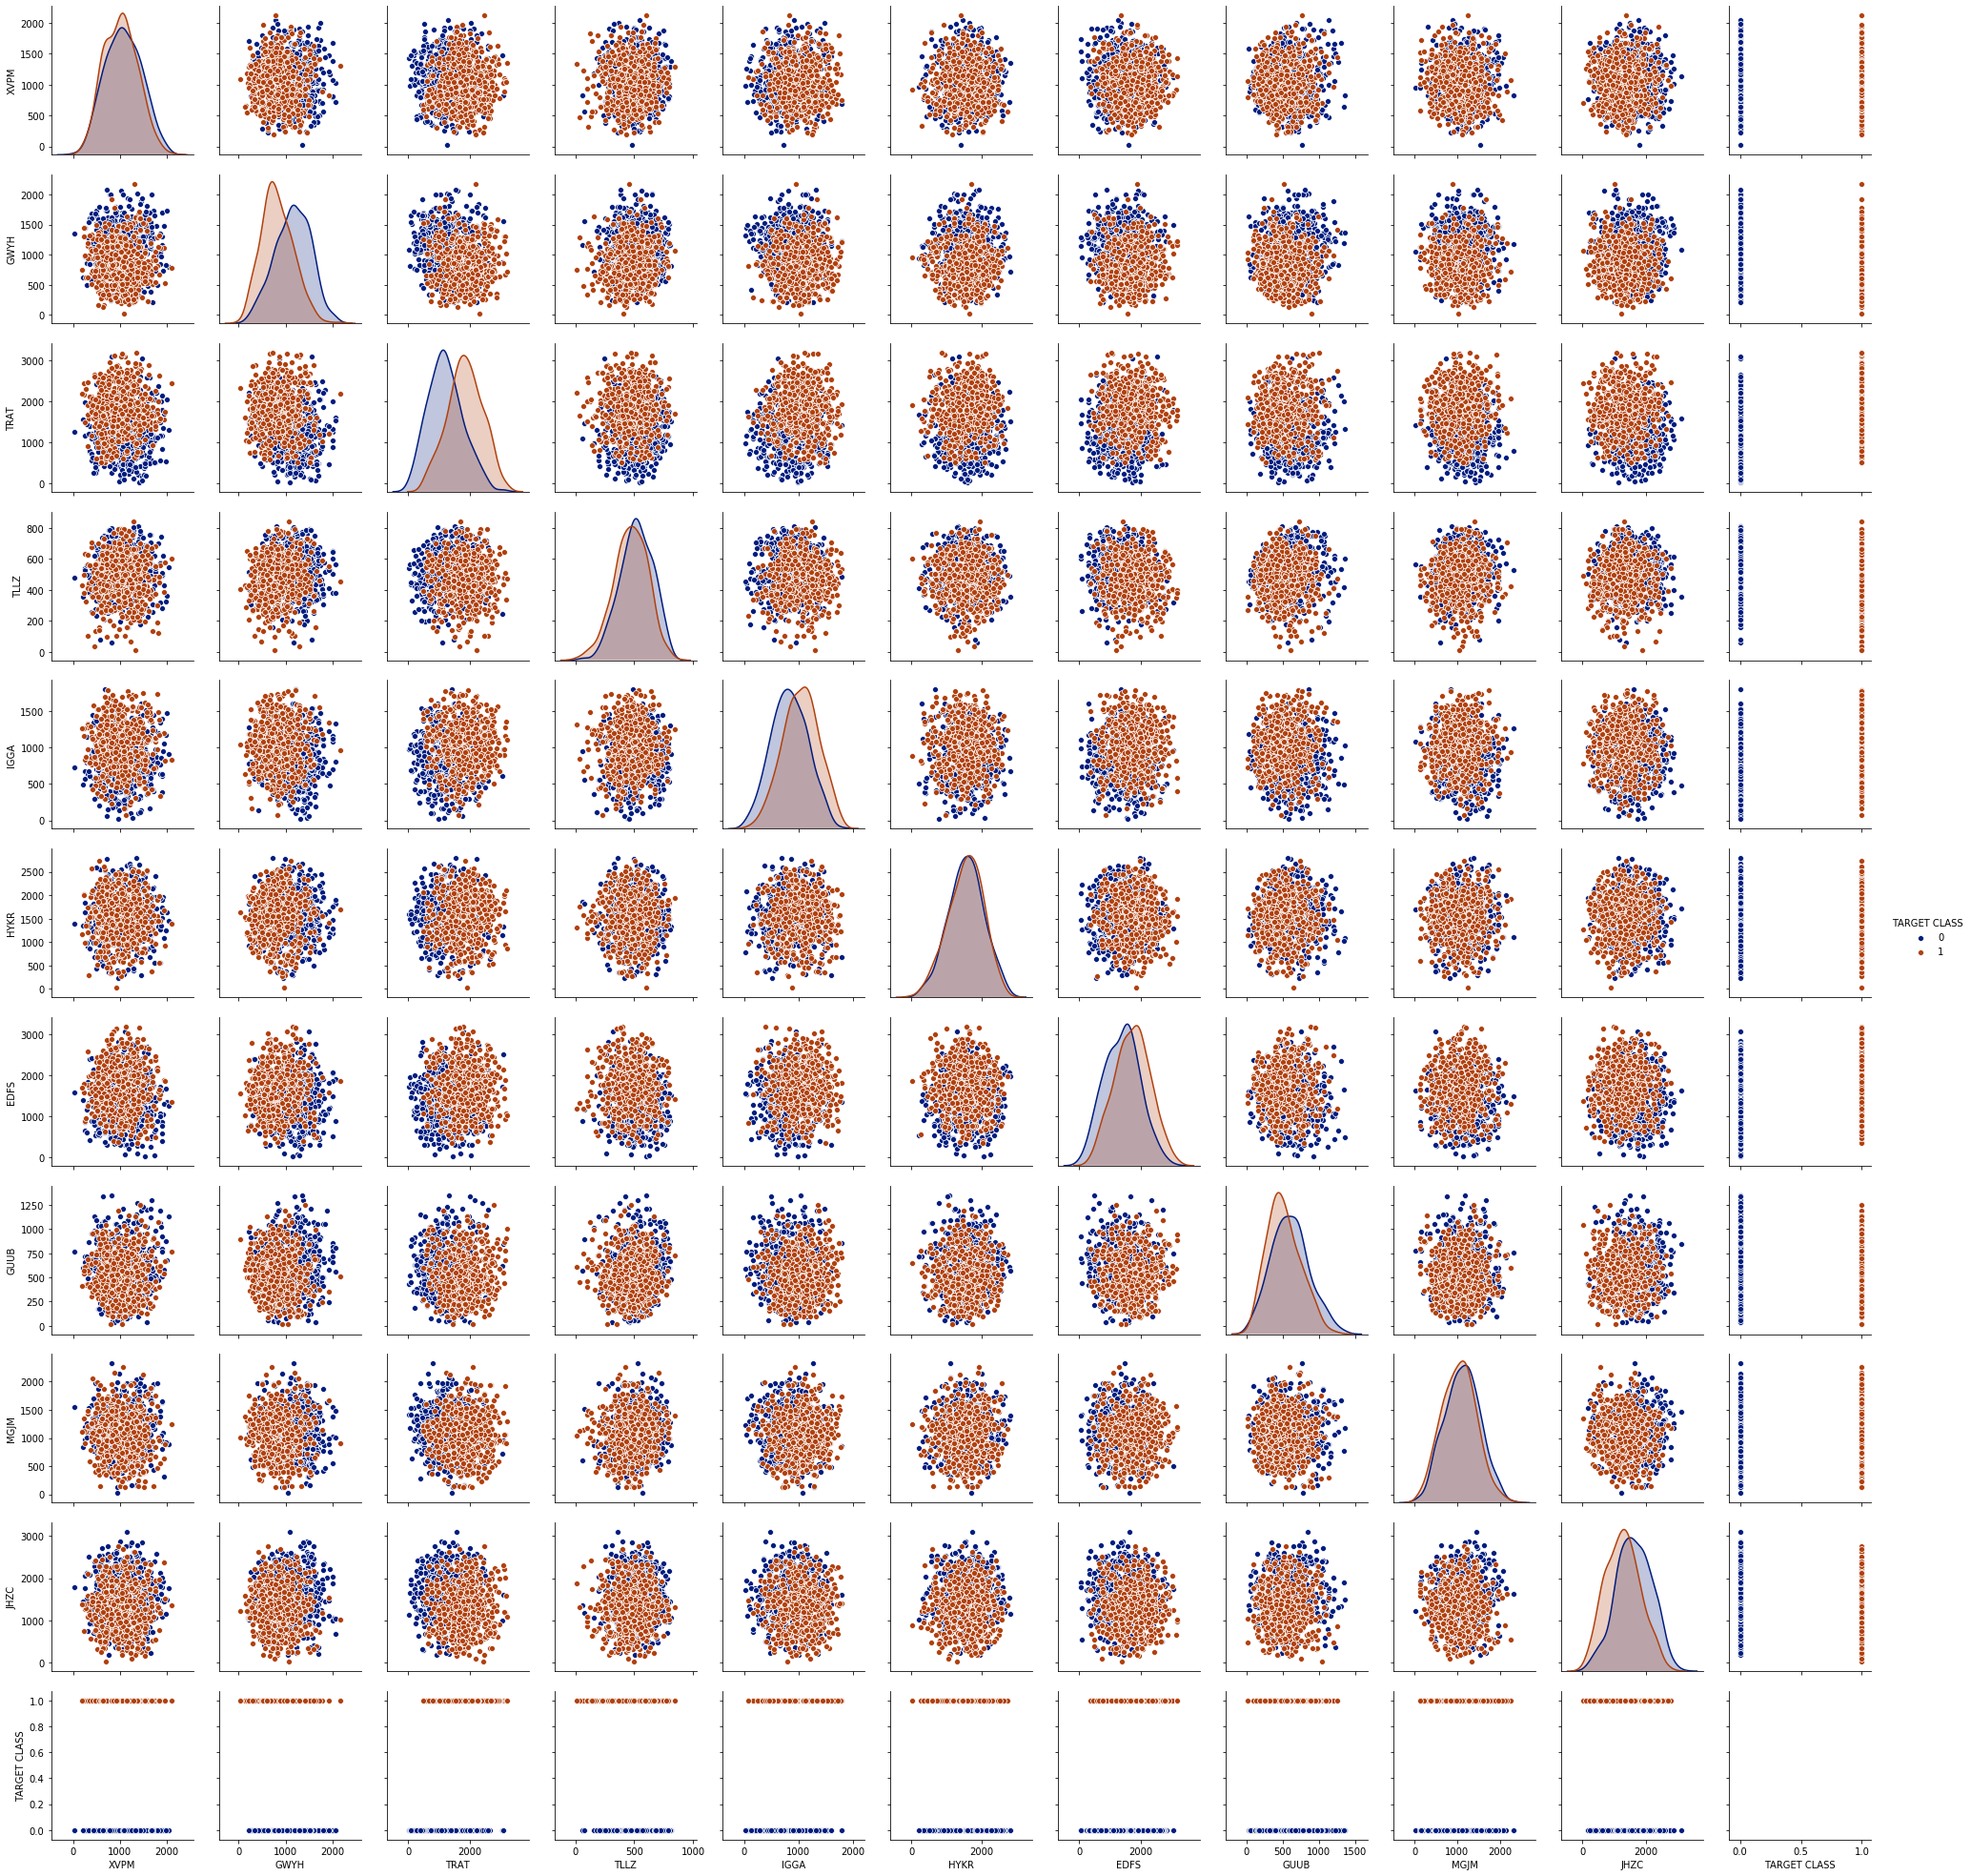

In [10]:
sns.pairplot(data=knn_data, hue='TARGET CLASS',palette='dark')

# Standardize Variables

Standardize the variables using StandardScaler. Fit scaler to the features. Use transform method to transform the features to a scaled version. Then convert the scaled features to a dataframe and check head to make sure the scaling worked. 

In [19]:
scaler = StandardScaler()

In [20]:
scaler.fit(knn_data.drop('TARGET CLASS', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
scaled_features = scaler.transform(knn_data.drop('TARGET CLASS', axis = 1))

In [22]:
df_features = pd.DataFrame(scaled_features, columns=knn_data.columns[:-1])
df_features.head(5)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train_Test_Split

Use train_test_split to split data into testing and training set. 

In [23]:
X = df_features
y = knn_data['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state= 101)

# Using K Nearest Neighbors(KNN)

Create a KNN model instance. Start with n_neighbors = 1. Next fit the KNN model to the training data. 

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Predicting and Evaluating

Now it's time to evaluate the KNN model. Use the predict method to predict values using your KNN model and X_test. Then create a confusion matrix to see missing values and then a classification report to report the measures of precision and recall. 

In [26]:
predictions = knn.predict(X_test)

In [27]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[109  43]
 [ 41 107]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



According to the report, our precision is at 71% at n=1 and recall is at 72%. 

# Choosing a K Value

Use the elbow method to pick a good K value that can optimize the precision and recall for the best model. 
To do that, create a loop that trains various KNN model with different k values, then keep track of the error_rate for each of these models with a list. Then make a graph that will show you the value with the lowest error rate. 

In [31]:
error_rate = []

for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    error_rate.append(np.mean(predictions != y_test))

Text(0, 0.5, 'Error Rate')

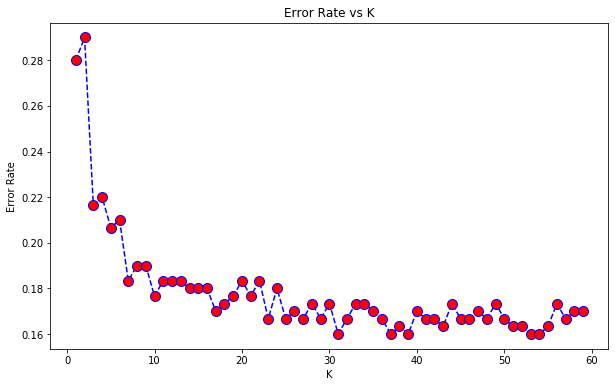

In [32]:
plt.figure(figsize = (10,6))
plt.plot(range(1,60),error_rate, color='blue', linestyle = '--', marker='o', 
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

According to the graph, the error rate starts to straighten out at about K=30. I am going to use K=38 because the next 2 data point error rates are very close to K=38 and I think will give use the best results. 

# Retrain with new K Value

Now retrain the model with the best K value(I picked 38) and re-do the classification report and confusion matrix. 

In [34]:
knn = KNeighborsClassifier(n_neighbors = 38)
knn.fit(X_train, y_train)
predicitions = knn.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[123  29]
 [ 22 126]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       152
           1       0.81      0.85      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



According to the report and matrix, the accuracy of the model has improved by 11% by optimizing the K value. 